In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def call_payoff(sT, strike_price, premium, contracts=1, multiplier=1):
    pnl = np.where(sT > strike_price, sT - strike_price, 0) - premium
    return pnl * contracts * multiplier

def put_payoff(sT, strike_price, premium, contracts=1, multiplier=1):
    pnl = np.where(sT < strike_price, strike_price - sT, 0) - premium
    return pnl * contracts * multiplier

def vega_payoff(initial_IV, changed_IV, vega):
    return (initial_IV - changed_IV) * vega

def plot_spread(st, values, strike, fig, ax, label):
    ax.spines['bottom'].set_position('zero')
    ax.plot(st, values, label=label)
    ax.plot(strike, 0, 'ro')
    ax.legend()
    ax.grid(True)
    ax.set_xlabel('stock price')
    ax.set_ylabel('P & L')

# Iron Condors

    사례1) Netflix 의 $95 call 을 팔고 $100 call 을 사서 net preminum 이 $1.45($10.15 - $8.70) 이 되도록 하고, 동시에 $85 put 을 팔고, $80 풋을 사서 net credit 이 $1.65($8.80 - $7.15) 가 되도록 한다. Total credit 은 $3.10 이 된다.
    이 전략의 최대 이익은 수수한 premium 이고 주가가 $85 와 $95 사이에서 옵션 만기가 되면 얻어진다. 최대 손실은 주식이 $100 call 행사가 이상이나 $80 put 행사가 밑으로 가면 발생한다. 이 경우 최대 손실은 call 과 put 옵션의 행사가 차이에서 수수한 프리미엄을 제외한 $1.90 이 된다.($5 - $3.10)
    Iron condor 는 상대적으로 낮은 payoff 를 갖지만 잠재적인 손실도 매우 제한적이다.

Max Profit = 3.10
Max Loss = -1.90


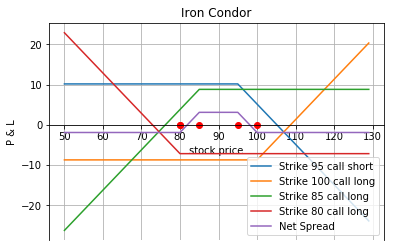

In [3]:
st = np.arange(50, 130, 1)
total_payoff = np.zeros(st.shape)
total_premium = 0
fig, ax = plt.subplots()

strike1 = 95
premium = 10.15
total_premium += premium

payoff = -call_payoff(st, strike1, premium)
plot_spread(st, payoff, strike1, fig, ax, 'Strike {} call short'.format(strike1))
total_payoff += payoff

strike2 = 100
premium = 8.70
total_premium -= premium

payoff = call_payoff(st, strike2, premium)
plot_spread(st, payoff, strike2, fig, ax, 'Strike {} call long'.format(strike2))
total_payoff += payoff

strike3 = 85
premium = 8.80
total_premium += premium

payoff = -put_payoff(st, strike3, premium)
plot_spread(st, payoff, strike3, fig, ax, 'Strike {} call long'.format(strike3))
total_payoff += payoff

strike4 = 80
premium = 7.15
total_premium -= premium

payoff = put_payoff(st, strike4, premium)
plot_spread(st, payoff, strike4, fig, ax, 'Strike {} call long'.format(strike4))
total_payoff += payoff

plot_spread(st, total_payoff, strike4, fig, ax, 'Net Spread')

plt.title('Iron Condor');

print('Max Profit = {:.2f}'.format(max(total_payoff)))
print('Max Loss = {:.2f}'.format(min(total_payoff)))

    사례2) RAI 주식이 $67 ~ $75 사이의 박스권을 최소 수주일 계속할 것으로 예상된다. 현재 이 옵션의 IV 는 25% 이고 이것은 연간 IV 변동폭이 12% - 30% 이므로 꽤 높게 inflate 되어 있다.

    $65 아래의 행사가로 put option 을 팔고, $75 근처에서 call option 을 판다. 4월 22일 만기 옵션을 이용하고 잔존 일수는 22 일이다. 이 거래의 total 프리미엄은 주당 $1.20 이 된다.
    
    이 거래의 보험으로서 $80 call 과 $60 put 을 산다. 프리미엄은 주당 $.50 이고 net credit 은 주당 $.70 이 된다.

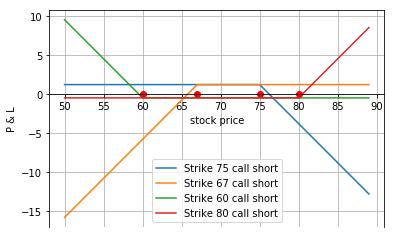

In [10]:
st = np.arange(50, 90, 1)
total_payoff = np.zeros(st.shape)
total_premium = 0
fig, ax = plt.subplots()

strike1 = 75
premium = 1.2
total_premium += premium

payoff = -call_payoff(st, strike1, premium)
plot_spread(st, payoff, strike1, fig, ax, 'Strike {} call short'.format(strike1))
total_payoff += payoff

strike2 = 67
premium = 1.2
total_premium += premium

payoff = -put_payoff(st, strike2, premium)
plot_spread(st, payoff, strike2, fig, ax, 'Strike {} call short'.format(strike2))
total_payoff += payoff

strike3 = 60
premium = 0.5
total_premium += premium

payoff = put_payoff(st, strike3, premium)
plot_spread(st, payoff, strike3, fig, ax, 'Strike {} call short'.format(strike3))
total_payoff += payoff

strike4 = 80
premium = 0.5
total_premium += premium

payoff = call_payoff(st, strike4, premium)
plot_spread(st, payoff, strike4, fig, ax, 'Strike {} call short'.format(strike4))
total_payoff += payoff

In [12]:
def ironCondor(short_put, short_call, long_put, long_call, st_range):
    
    st = np.arange(st_range[0], st_range[1], st_range[2])
    total_payoff = np.zeros(st.shape)
    total_premium = 0
    fig, ax = plt.subplots()

    strike1, premium = short_put
    total_premium += premium

    payoff = -put_payoff(st, strike1, premium)
    plot_spread(st, payoff, strike1, fig, ax, 'Strike {} call short'.format(strike1))
    total_payoff += payoff

    strike2, premium = short_call
    premium = 1.2
    total_premium += premium

    payoff = -call_payoff(st, strike2, premium)
    plot_spread(st, payoff, strike2, fig, ax, 'Strike {} call short'.format(strike2))
    total_payoff += payoff

    strike3, premium = long_put
    total_premium += premium

    payoff = put_payoff(st, strike3, premium)
    plot_spread(st, payoff, strike3, fig, ax, 'Strike {} call short'.format(strike3))
    total_payoff += payoff

    strike4, premium = long_call
    total_premium += premium

    payoff = call_payoff(st, strike4, premium)
    plot_spread(st, payoff, strike4, fig, ax, 'Strike {} call short'.format(strike4))
    total_payoff += payoff

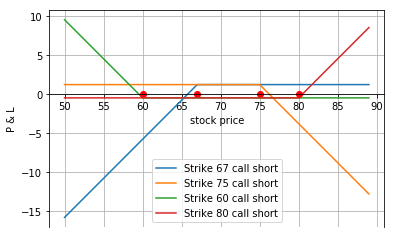

In [14]:
ironCondor((67, 1.2), (75, 1.2), (60, 0.5), (80, 0.5), (50, 90, 1))